<a href="https://colab.research.google.com/github/JVTh/School/blob/main/Correct_lab2_nlp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nils-holmberg/socs-qmd/blob/main/jnb/lab2_nlp2.ipynb)

# load text data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#!pip install gdown
!gdown https://drive.google.com/uc?id=1G9-4_whd8BCObf3Gp6HDFFpQbDt_eTvy

Downloading...
From: https://drive.google.com/uc?id=1G9-4_whd8BCObf3Gp6HDFFpQbDt_eTvy
To: /content/comments.xlsx
100% 106k/106k [00:00<00:00, 77.4MB/s]


In [ ]:
fp = "comments.xlsx"
df = pd.read_excel(fp, header=None, names=['id', 'text','link'])
df.head()

,id,text,link
0,Stabile_Feldmaus,No but the learning of this war should be that...,/r/europe/comments/119wltg/war_in_ukraine_mega...
1,Ishana92,Troubles in paradise between poland and hungar...,/r/europe/comments/11exdsl/hungary_links_nato_...
2,ILikeTheAk47,Whats the point of NATO if it lets two dictato...,/r/europe/comments/11e60q4/orban_demands_that_...
3,Benur21,Sweden and Finland definitely don't have to sa...,/r/europe/comments/11exdsl/hungary_links_nato_...
4,UpgradedSiera6666,What is foolinsh from Orban is that he will be...,/r/europe/comments/11exdsl/hungary_links_nato_...


In [ ]:
df.shape

(400, 3)

In [ ]:
# Convert to list
corpus = df.text.values.tolist()
corpus[:2]

['No but the learning of this war should be that we need those stock piles. This situation where Russia, China or someone else attacks a nation and NATO cannot directly intervene and send too advanced equipment could repeat.',
 "Troubles in paradise between poland and hungary?\n\nBtw, i know a country can leave the nato, and that's a serious threat coming from turkey that hungary just doesnt have as a last resort blackmail. Can a country be kicked out?"]

In [ ]:
corpus_test = ["Rafael Nadal Joins Roger Federer in Missing U.S. Open",
          "Rafael Nadal Is Out of the Australian Open",
          "Biden Announces Virus Measures",
          "Biden's Virus Plans Meet Reality",
          "Where Biden's Virus Plan Stands"]

In [ ]:
# Download necessary NLTK data
import nltk
nltk.download('popular')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [ ]:
# define data cleaning function
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# clean data stored in a new list
clean_corpus = [clean(doc).split() for doc in corpus]

In [ ]:
clean_corpus

[['learning',
  'war',
  'need',
  'stock',
  'pile',
  'situation',
  'russia',
  'china',
  'someone',
  'else',
  'attack',
  'nation',
  'nato',
  'cannot',
  'directly',
  'intervene',
  'send',
  'advanced',
  'equipment',
  'could',
  'repeat'],
 ['trouble',
  'paradise',
  'poland',
  'hungary',
  'btw',
  'know',
  'country',
  'leave',
  'nato',
  'thats',
  'serious',
  'threat',
  'coming',
  'turkey',
  'hungary',
  'doesnt',
  'last',
  'resort',
  'blackmail',
  'country',
  'kicked',
  'out'],
 ['whats', 'point', 'nato', 'let', 'two', 'dictator', 'it'],
 ['sweden',
  'finland',
  'definitely',
  'sacrifice',
  'anything',
  'hungary',
  'get',
  'kicked',
  'nato',
  'needed'],
 ['foolinsh',
  'orban',
  'dragged',
  'nato',
  'art5',
  'eu',
  'art',
  '472',
  'matter',
  'want',
  'doent',
  'respond',
  'kind',
  'hungary',
  'isolated',
  'remembered',
  'within',
  'eu',
  'structure',
  'also',
  'united',
  'kingdom',
  'france',
  'u',
  'already',
  'reassured

# document term matrix (gensim approach)

![](https://raw.githubusercontent.com/nils-holmberg/socs-qmd/main/res/img/nlp-image_0-259d7a671398a16dc7cdfe05d89d4880.png)


In [ ]:
# Importing Gensim - pre installed in Colab (not anaconada or local fx)
import gensim
from gensim import corpora

In [ ]:
# Creating the term dictionary of our courpus that is of all the words (Sepcific to Genism syntax perspective),
# where every unique term is assigned an index.

dict_ = corpora.Dictionary(clean_corpus)

print(dict_)

Dictionary<4745 unique tokens: ['advanced', 'attack', 'cannot', 'china', 'could']...>


In [ ]:
# The dictionary had 18 unqiue words in the cleaned corpus. Meaning we have 18 unique terms in the dataset creating 18 columns, each with 5 rows.
for i in dict_.values():
    print(i)

advanced
attack
cannot
china
could
directly
else
equipment
intervene
learning
nation
nato
need
pile
repeat
russia
send
situation
someone
stock
war
blackmail
btw
coming
country
doesnt
hungary
kicked
know
last
leave
out
paradise
poland
resort
serious
thats
threat
trouble
turkey
dictator
it
let
point
two
whats
anything
definitely
finland
get
needed
sacrifice
sweden
472
accession
already
also
art
art5
case
doent
dragged
eu
foolinsh
france
helped
isolated
kind
kingdom
matter
militarly
orban
proccess
reassured
remembered
respond
structure
u
united
want
within
would
1213
22
247
5
abuser
academic
accusing
act
acting
active
actually
again
agenda
aircraft
allah
alliance
allowed
ally
america
among
angel
another
antierdogan
antiwestern
anytime
apparently
application
approving
arm
around
attempt
avrasyacılar
back
bad
banned
basically
beat
behind
believe
belowhttpswwwredditcomreuropecomments11f2r0hfinnishparliamenthasapprovedthejahb034
benefit
biased
bombarded
bring
build
bullshit
by
called
carrier


In [ ]:
# Converting list of documents (corpus) into Document Term Matrix using the dictionary. So the values in the brackets are key value terms, starting from 0, we see that the first keyword comes up once.
doc_term_matrix = [dict_.doc2bow(i) for i in clean_corpus]
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1)],
 [(11, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 2),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1)],
 [(11, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1)],
 [(11, 1),
  (26, 1),
  (27, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1)],
 [(11, 1),
  (26, 1),
  (48, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 2),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1)],
 [(3, 2),
  (4, 

# topic modeling (gensim approach)

In [ ]:
# Creating the object for LDA model using gensim library from where we can do the topic analysis.
Lda = gensim.models.ldamodel.LdaModel

In [ ]:
# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=2, id2word=dict_, passes=1, random_state=0, eval_every=None)

In [ ]:
# Prints the topics with the indexes: 0,1,2 :
# we need to manually check whethere the topics are different from one another or not. explorative approach, only understands that some terms seem to occur more frequently in some documents.
ldamodel.print_topics()

[(0,
  '0.021*"nato" + 0.009*"russia" + 0.008*"country" + 0.007*"would" + 0.006*"ukraine" + 0.006*"war" + 0.006*"u" + 0.005*"eu" + 0.004*"finland" + 0.004*"people"'),
 (1,
  '0.021*"nato" + 0.016*"russia" + 0.008*"ukraine" + 0.008*"u" + 0.007*"war" + 0.007*"country" + 0.006*"would" + 0.006*"like" + 0.006*"eu" + 0.005*"even"')]

In [ ]:
# num_topics mean: how many topics want to extract
# num_words: the number of words that want per topic
print(ldamodel.print_topics(num_topics=2, num_words=5))

[(0, '0.021*"nato" + 0.009*"russia" + 0.008*"country" + 0.007*"would" + 0.006*"ukraine"'), (1, '0.021*"nato" + 0.016*"russia" + 0.008*"ukraine" + 0.008*"u" + 0.007*"war"')]


In [ ]:
# printing the topic associations with the documents
count = 0
for i in ldamodel[doc_term_matrix]:
    print("doc : ",count,i)
    count += 1

doc :  0 [(0, 0.11701869), (1, 0.88298136)]
doc :  1 [(0, 0.032793403), (1, 0.9672066)]
doc :  2 [(0, 0.8202402), (1, 0.17975982)]
doc :  3 [(0, 0.50992745), (1, 0.49007252)]
doc :  4 [(0, 0.9767511), (1, 0.02324893)]
doc :  5 [(0, 0.9183636), (1, 0.081636496)]
doc :  6 [(0, 0.03640146), (1, 0.96359855)]
doc :  7 [(1, 0.99098146)]
doc :  8 [(0, 0.9587785), (1, 0.041221477)]
doc :  9 [(0, 0.020093625), (1, 0.9799064)]
doc :  10 [(0, 0.062408272), (1, 0.93759173)]
doc :  11 [(0, 0.8638945), (1, 0.13610551)]
doc :  12 [(0, 0.053178344), (1, 0.94682163)]
doc :  13 [(0, 0.99015194)]
doc :  14 [(0, 0.04062995), (1, 0.9593701)]
doc :  15 [(0, 0.025243102), (1, 0.9747569)]
doc :  16 [(0, 0.19379051), (1, 0.80620956)]
doc :  17 [(0, 0.045259662), (1, 0.95474035)]
doc :  18 [(0, 0.24634968), (1, 0.75365037)]
doc :  19 [(0, 0.9768412), (1, 0.023158759)]
doc :  20 [(0, 0.9868569), (1, 0.013143122)]
doc :  21 [(0, 0.0469114), (1, 0.95308864)]
doc :  22 [(0, 0.34709486), (1, 0.65290517)]
doc :  23 [

# topic modeling optimization (gensim)

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
# Convert to list
data = df.text.values.tolist()

In [ ]:
print(data[:2])

['No but the learning of this war should be that we need those stock piles. This situation where Russia, China or someone else attacks a nation and NATO cannot directly intervene and send too advanced equipment could repeat.', "Troubles in paradise between poland and hungary?\n\nBtw, i know a country can leave the nato, and that's a serious threat coming from turkey that hungary just doesnt have as a last resort blackmail. Can a country be kicked out?"]


In [ ]:
import re

if False:
    df['text'] = df['text'].str.replace("&#039;", "'", regex=False)
    # Remove Emails
    data = [re.sub(r'\S*@\S*\s?', '', str(sent)) for sent in data]
    # Remove new line characters
    data = [re.sub(r'\s+', ' ', str(sent)) for sent in data]
    # Remove distracting single quotes
    data = [re.sub(r"\'", "", str(sent)) for sent in data]
    print(data[:2])

In [ ]:
# spacy for nlp analysis
import spacy

def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)

lemmatized_texts = lemmatization(data)
print(lemmatized_texts[0][0:50])

learning war need stock pile situation else attack


In [ ]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print(data_words[0][0:5])

['learning', 'war', 'need', 'stock', 'pile']


In [ ]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

print(corpus[0][0:20])


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]


In [ ]:
word = id2word[[0][:1][0]]
print(word)

advanced


In [ ]:
id2word[0]

'advanced'

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('advanced', 1),
  ('attack', 1),
  ('directly', 1),
  ('else', 1),
  ('equipment', 1),
  ('intervene', 1),
  ('learning', 1),
  ('nation', 1),
  ('need', 1),
  ('pile', 1),
  ('repeat', 1),
  ('send', 1),
  ('situation', 1),
  ('stock', 1),
  ('too', 1),
  ('war', 1)]]

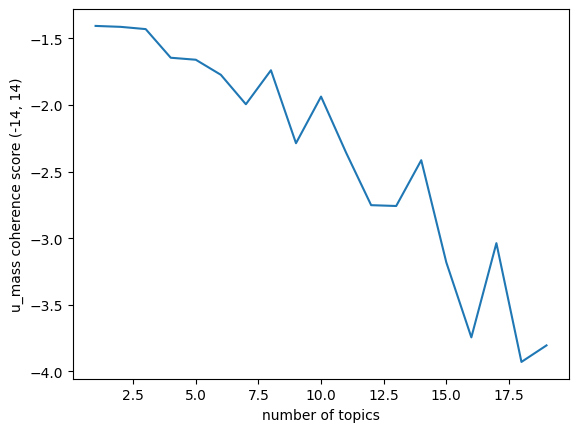

In [ ]:
topics = []
score = []

for i in range(1,20,1):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=i, iterations=10, passes=10, random_state=100)
  cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass')
  topics.append(i)
  score.append(cm.get_coherence())

_=plt.plot(topics, score)
_=plt.xlabel('number of topics')
_=plt.ylabel('u_mass coherence score (-14, 14)')
plt.show()

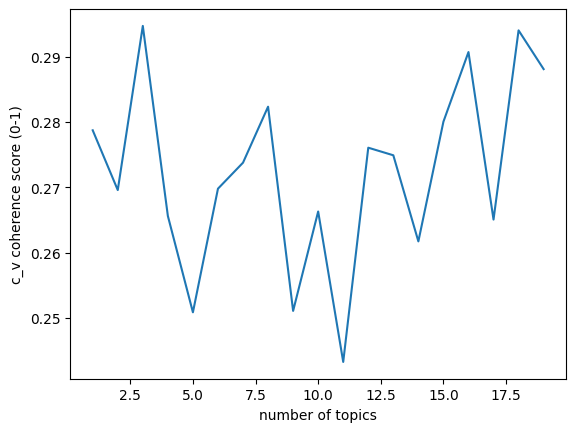

In [ ]:
topics = []
score = []

for i in range(1,20,1):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=i, iterations=10, passes=10, random_state=100)
  cm = CoherenceModel(model=lda_model, texts=data_words, corpus=corpus, dictionary=id2word, coherence='c_v')
  topics.append(i)
  score.append(cm.get_coherence())

_=plt.plot(topics, score)
_=plt.xlabel('number of topics')
_=plt.ylabel('c_v coherence score (0-1)')
plt.show()

In [ ]:
# modeling with optimal number of topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, iterations=10, passes=10, random_state=100)


In [ ]:
# Print topics
lda_model.print_topics(-1)

[(0,
  '0.010*"war" + 0.008*"country" + 0.006*"even" + 0.006*"military" + 0.006*"more" + 0.006*"say" + 0.006*"russian" + 0.006*"thing" + 0.006*"need" + 0.005*"just"'),
 (1,
  '0.014*"country" + 0.010*"war" + 0.009*"get" + 0.008*"need" + 0.007*"want" + 0.007*"other" + 0.006*"also" + 0.006*"make" + 0.006*"well" + 0.005*"only"'),
 (2,
  '0.008*"just" + 0.008*"so" + 0.007*"more" + 0.007*"go" + 0.007*"say" + 0.006*"member" + 0.006*"country" + 0.006*"make" + 0.006*"war" + 0.005*"people"')]

# topic modeling visualization (gensim)

In [ ]:
# fix dependency
!pip install --upgrade pandas
# topic modeling plotting tools
!pip install -q pyLDAvis
import pyLDAvis
import pyLDAvis.gensim

In [ ]:
# Visualize the topics
#pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis)
#vis

In [ ]:
# Save the report
pyLDAvis.save_html(vis, 'lab2-nlp2-topics.html')

# topic modelling with gensim and pyldavis
- [https://nils-holmberg.github.io/cca-nlp/jnb/scom-gpols-topics.html](https://nils-holmberg.github.io/cca-nlp/jnb/scom-gpols-topics.html)